# Mini Project II - Employee Turnover Prediction and Analysis

## What is Employee Turnover

Employee turnover refers to the number of employees who leave an organization which is replaced with new employees. Employee turnover rate is the percentage of employees leave during a certain period. This depends on the industry, size of the company, size of the department and job type etc. Low employee turnover rate is aimed by any organization.
<br><br>
Some of the reason for turnover are: 
- Lack of career growth
- Lack of work-life balance
- Low salary
- Poor work environment

## Problem Definition

Understand the reasons for the employee turnover in order to make the necessary changes to maintain the required workforce with minimum costs associated with it.
<br><br>
Some of the costs associated with turnover are:
- Recruitment
- Training
- Relationships with clients or stakeholders
- Quality of the service or product
- Poor productivity 

## Business Question

- What are the most influence factors for employee turnover?
- How can we reduce employee turnover and reduce the cost of turnover?
- What patterns can be identified?
- Which departments/areas are mostly impacted?
- What strategies can be implemented to improve employee retention?


## Dataset

This data set is available in www.kaggle.com, published by IBM. It contains 1470 rows and 35 features.

Categorical Variables : BusinessTravel, Department, EmployeeCount, EducationField, Gender ,JobRole, MaritalStatus, Over18 ,OverTime

Numerical Variables : Age, Daily Rate, Distance From Home, Education, Employee Number, EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager 


Some of the feature breakdown as below,

Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

EnvironmentSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobInvolvement
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

PerformanceRating
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

RelationshipSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

WorkLifeBalance
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

 ###### Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

###### Read the Data

In [2]:
hr_df = pd.read_csv('./data/hr_employee_attrition.csv')

## EDA

- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
  
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [3]:
hr_df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [4]:
hr_df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [5]:
hr_df.shape

(1470, 35)

In [6]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

###### Check for **Null** values 

In [7]:
hr_df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

###### Check for ** Duplicate * values 

In [8]:
hr_df.duplicated().sum()

0

###### Check for **Zero** values 

In [9]:
hr_df.isin([0]).sum()

Age                           0
Attrition                     0
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked          197
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel            631
TotalWorkingYears            11
TrainingTimesLastYear        54
WorkLifeBalance               0
YearsAtC

In [10]:

hr_df['StockOptionLevel'] =hr_df['StockOptionLevel'].replace(0, hr_df.StockOptionLevel.mean())

In [11]:
 # Above all zero values can be zero 

In [12]:
hr_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,1.134651,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.582334,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.793878,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.793878,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


###### Target Variable is Attrition.

In [13]:
hr_df['Attrition'] = hr_df['Attrition'].replace(['Yes','No'],[1,0])

###### Numerical Feature Overview

In [14]:
hr_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,1.134651,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.582334,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.793878,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.793878,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Attrition'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'EmployeeCount'}>,
        <AxesSubplot:title={'center':'EmployeeNumber'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>],
       [<AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>],
       [<AxesSubplot:title={'center':'PercentSalaryHike'}>,
        <AxesSubplot:title={'center':'PerformanceRating'}>,
        <AxesSubplot:title={'center':'Relations

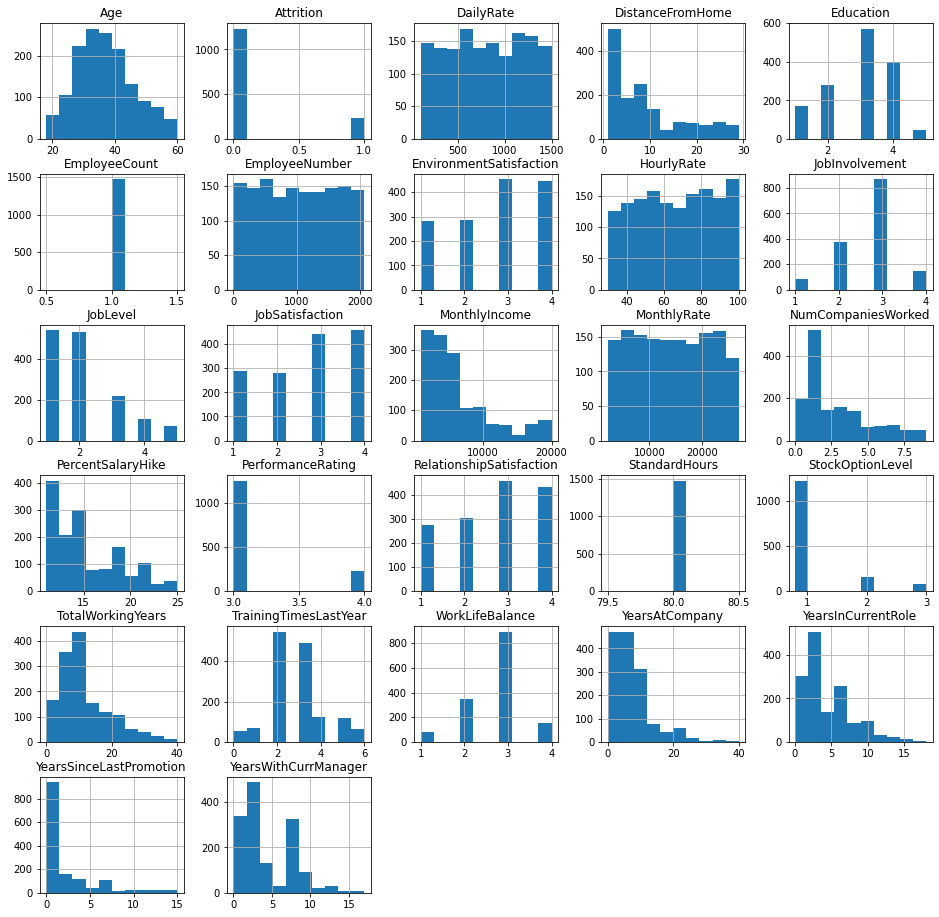

In [15]:
hr_df.hist(figsize=(16,16))

<AxesSubplot:>

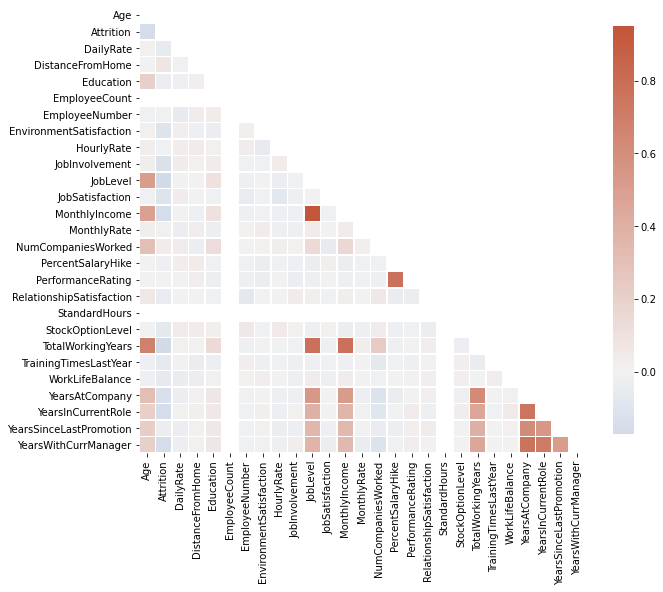

In [16]:
corr = hr_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, axes = plt.subplots(1,1,figsize=(10,10))
cmap = sns.diverging_palette(250, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, mask=mask, square=True
            , linewidths=.5, cbar_kws={"shrink": .75}
            , center=0, ax=axes)



In [17]:
hr_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0.793878,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1.000000,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0.793878,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0.793878,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1.000000,6,3,3,2,2,2,2


#### Data Visualization

###### Attrition

In [18]:
att=hr_df.groupby("Attrition")['Attrition'].count()
att

Attrition
0    1233
1     237
Name: Attrition, dtype: int64

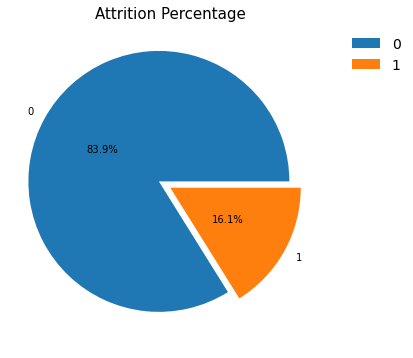

In [19]:
pie, ax = plt.subplots(figsize=[10,6])
labels = '0','1'
my_explode = (0.1, 0)
plt.pie(x=att, autopct="%.1f%%", explode=my_explode,labels=labels, pctdistance=0.5)
plt.title("Attrition Percentage", fontsize=15);
ax.legend(frameon=False, bbox_to_anchor=(1.02, 1),fontsize=14)

In [20]:
# In the sample of 1470 employees, 16.1% left their jobs, while the remaining 83.9%are still in service with the company.

###### Attrition vs Gender

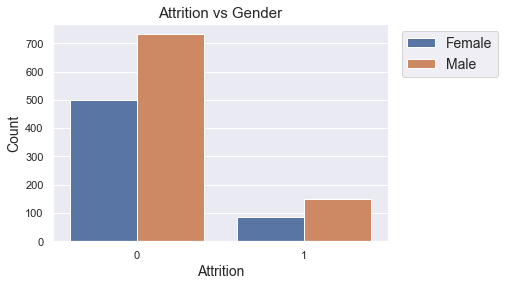

In [21]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots()
sns.countplot(x="Attrition",hue="Gender", data=hr_df)
ax.set_title("Attrition vs Gender",fontsize=15)
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left',fontsize=14)
ax.set_xlabel('Attrition',fontsize=14);
ax.set_ylabel('Count',fontsize=14);

plt.show()

In [22]:
# Majority of turnedover employees are from male catagory.

###### Attrition vs BusinessTravel

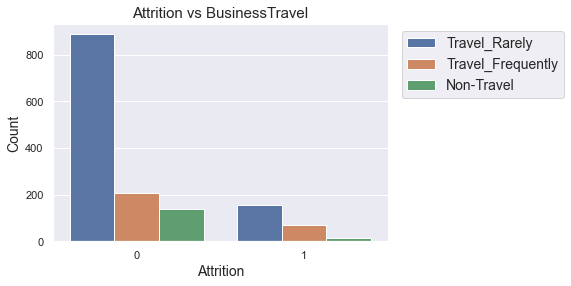

In [23]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots()
sns.countplot(x="Attrition",hue="BusinessTravel", data=hr_df)
ax.set_title("Attrition vs BusinessTravel",fontsize=15)
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left',fontsize=14)
ax.set_xlabel('Attrition',fontsize=14);
ax.set_ylabel('Count',fontsize=14);

plt.show()

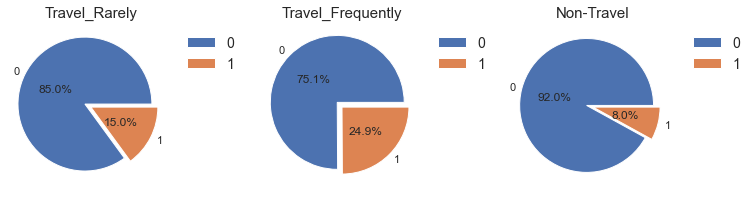

In [24]:
dfwlb= hr_df[hr_df.BusinessTravel=='Travel_Rarely']
plt.figure(figsize = (12, 8))
plt.subplots_adjust(wspace=0.5, hspace=2)

plt.subplot(131)
ax = plt.gca()
labels = '0','1'
my_explode = (0.1, 0)
plt.pie(x=dfwlb.groupby("Attrition")['Attrition'].count(), autopct="%.1f%%", explode=my_explode,labels=labels, pctdistance=0.5)
plt.title("Travel_Rarely", fontsize=15);
ax.legend(frameon=False, bbox_to_anchor=(1, 1),fontsize=14)

dfwlb1= hr_df[hr_df.BusinessTravel=='Travel_Frequently']
plt.subplot(132)
ax = plt.gca()
plt.pie(x=dfwlb1.groupby("Attrition")['Attrition'].count(), autopct="%.1f%%",explode=my_explode,labels=labels, pctdistance=0.5)
plt.title("Travel_Frequently", fontsize=15);
ax.legend(frameon=False, bbox_to_anchor=(1, 1),fontsize=14)


dfwlb2= hr_df[hr_df.BusinessTravel=='Non-Travel']
plt.subplot(133)
ax = plt.gca()
plt.pie(x=dfwlb2.groupby("Attrition")['Attrition'].count(), autopct="%.1f%%", explode=my_explode,labels=labels, pctdistance=0.5)
plt.title("Non-Travel", fontsize=15);
ax.legend(frameon=False, bbox_to_anchor=(1.02, 1),fontsize=14)


In [25]:
# Travel_Frequently  has the highest(24.9%) rate compared to other. Non- Travel has the lowest turnover percentage.

###### Attrition vs Department

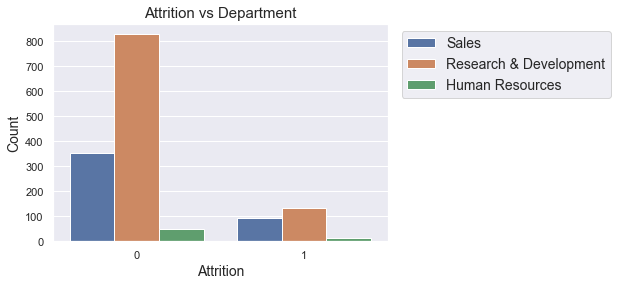

In [26]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots()
sns.countplot(x="Attrition",hue="Department", data=hr_df)
ax.set_title("Attrition vs Department",fontsize=15)
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left',fontsize=14)
ax.set_xlabel('Attrition',fontsize=14);
ax.set_ylabel('Count',fontsize=14);

plt.show()

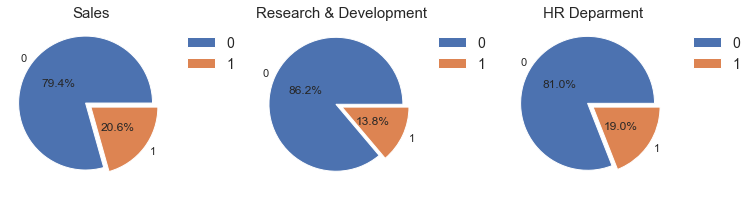

In [27]:
dfwlb= hr_df[hr_df.Department=='Sales']
plt.figure(figsize = (12, 8))
plt.subplots_adjust(wspace=0.5, hspace=2)

plt.subplot(131)
ax = plt.gca()
labels = '0','1'
my_explode = (0.1, 0)
plt.pie(x=dfwlb.groupby("Attrition")['Attrition'].count(), autopct="%.1f%%",explode=my_explode,labels=labels, pctdistance=0.5)
plt.title("Sales", fontsize=15);
ax.legend(frameon=False, bbox_to_anchor=(1, 1),fontsize=14)

dfwlb1= hr_df[hr_df.Department=='Research & Development']
plt.subplot(132)
ax = plt.gca()
plt.pie(x=dfwlb1.groupby("Attrition")['Attrition'].count(), autopct="%.1f%%", explode=my_explode,labels=labels, pctdistance=0.5)
plt.title("Research & Development", fontsize=15);
ax.legend(frameon=False, bbox_to_anchor=(1, 1),fontsize=14)


dfwlb2= hr_df[hr_df.Department=='Human Resources']
plt.subplot(133)
ax = plt.gca()
plt.pie(x=dfwlb2.groupby("Attrition")['Attrition'].count(), autopct="%.1f%%", explode=my_explode,labels=labels, pctdistance=0.5)
plt.title("HR Deparment", fontsize=15);
ax.legend(frameon=False, bbox_to_anchor=(1.02, 1),fontsize=14)


In [28]:
# Sales department has the highest percentage(20.6%)

###### Attrition vs EducationField

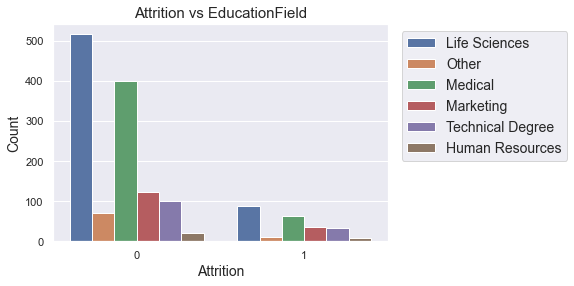

In [29]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots()
sns.countplot(x="Attrition",hue="EducationField", data=hr_df)
ax.set_title("Attrition vs EducationField",fontsize=15)
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left',fontsize=14)
ax.set_xlabel('Attrition',fontsize=14);
ax.set_ylabel('Count',fontsize=14);

plt.show()

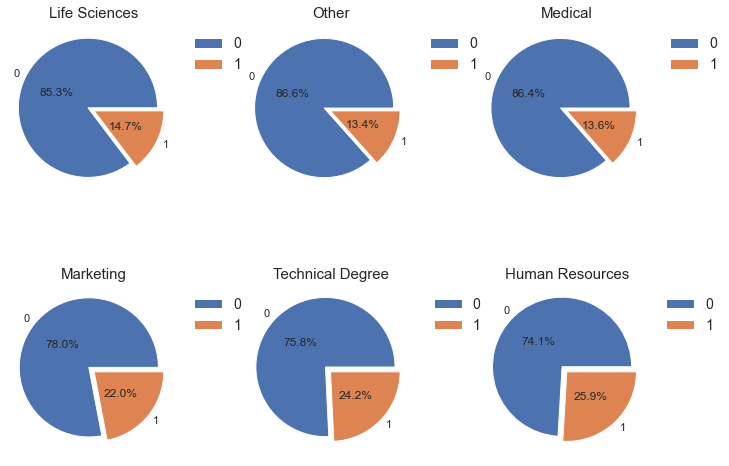

In [30]:
dfwlb= hr_df[hr_df.EducationField=='Life Sciences']
plt.figure(figsize = (12, 8))
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.subplot(231)
ax = plt.gca()
labels = '0','1'
my_explode = (0.1, 0)
plt.pie(x=dfwlb.groupby("Attrition")['Attrition'].count(), autopct="%.1f%%", explode=my_explode,labels=labels, pctdistance=0.5)
plt.title("Life Sciences", fontsize=15);
ax.legend(frameon=False, bbox_to_anchor=(1, 1),fontsize=14)

dfwlb1= hr_df[hr_df.EducationField=='Other']
plt.subplot(232)
ax = plt.gca()
plt.pie(x=dfwlb1.groupby("Attrition")['Attrition'].count(), autopct="%.1f%%", explode=my_explode,labels=labels, pctdistance=0.5)
plt.title("Other", fontsize=15);
ax.legend(frameon=False, bbox_to_anchor=(1, 1),fontsize=14)


dfwlb2= hr_df[hr_df.EducationField=='Medical']
plt.subplot(233)
ax = plt.gca()
plt.pie(x=dfwlb2.groupby("Attrition")['Attrition'].count(), autopct="%.1f%%", explode=my_explode,labels=labels, pctdistance=0.5)
plt.title("Medical", fontsize=15);
ax.legend(frameon=False, bbox_to_anchor=(1.02, 1),fontsize=14)

dfwlb3= hr_df[hr_df.EducationField=='Marketing']
plt.subplot(234)
ax = plt.gca()
plt.pie(x=dfwlb3.groupby("Attrition")['Attrition'].count(), autopct="%.1f%%", explode=my_explode,labels=labels, pctdistance=0.5)
plt.title("Marketing", fontsize=15);
ax.legend(frameon=False, bbox_to_anchor=(1, 1),fontsize=14)


dfwlb4= hr_df[hr_df.EducationField=='Technical Degree']
plt.subplot(235)
ax = plt.gca()
plt.pie(x=dfwlb4.groupby("Attrition")['Attrition'].count(), autopct="%.1f%%",explode=my_explode,labels=labels, pctdistance=0.5)
plt.title("Technical Degree", fontsize=15);
ax.legend(frameon=False, bbox_to_anchor=(1.02, 1),fontsize=14)

dfwlb5= hr_df[hr_df.EducationField=='Human Resources']
plt.subplot(236)
ax = plt.gca()
plt.pie(x=dfwlb5.groupby("Attrition")['Attrition'].count(), autopct="%.1f%%",explode=my_explode,labels=labels, pctdistance=0.5)
plt.title("Human Resources", fontsize=15);
ax.legend(frameon=False, bbox_to_anchor=(1, 1),fontsize=14)



In [31]:
# The most affected education fields are Human Resource, Technical Degree and Marketing.

###### Jobrole

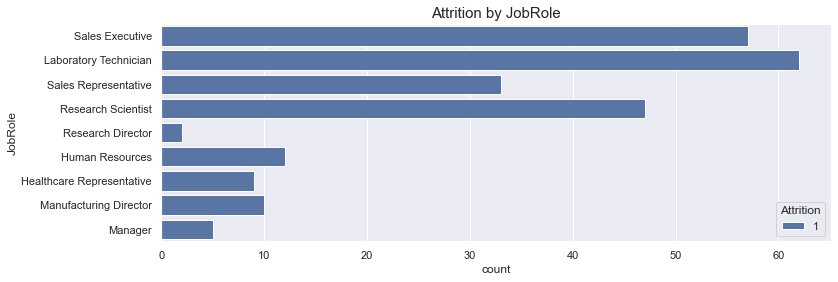

In [32]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (12, 4))
sns.countplot(y="JobRole",hue="Attrition", data=hr_df[hr_df.Attrition==1]).set_title("Attrition by JobRole",fontsize=15)
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left',fontsize=14)
ax.set_ylabel('Attrition',fontsize=14);
ax.set_xlabel('Count',fontsize=14);

plt.show()

In [33]:
# Laboratory technician (job role) has the highest employee turnover among other job roles. 

###### MaritalStatus

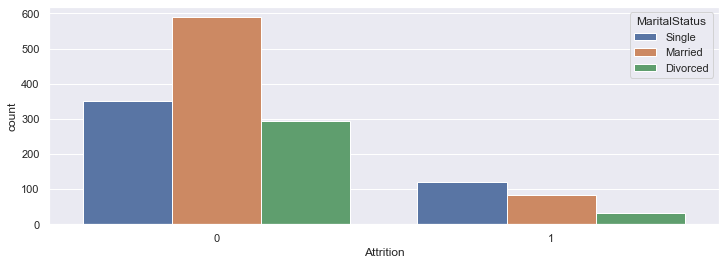

In [34]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (12, 4))
sns.countplot(x="Attrition",hue="MaritalStatus", data=hr_df)
ax.set_title("Attrition vs JobRole",fontsize=15)
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left',fontsize=14)
ax.set_xlabel('Attrition',fontsize=14);
ax.set_ylabel('Count',fontsize=14);

plt.show()

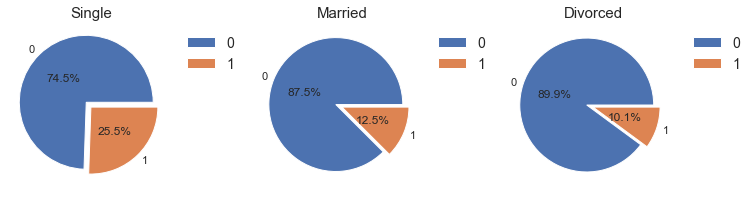

In [35]:
dfwlb= hr_df[hr_df.MaritalStatus=='Single']
plt.figure(figsize = (12, 8))
plt.subplots_adjust(wspace=0.5, hspace=2)

plt.subplot(131)
ax = plt.gca()
labels = '0','1'
my_explode = (0.1, 0)
plt.pie(x=dfwlb.groupby("Attrition")['Attrition'].count(), autopct="%.1f%%", explode=my_explode,labels=labels, pctdistance=0.5)
plt.title("Single", fontsize=15);
ax.legend(frameon=False, bbox_to_anchor=(1, 1),fontsize=14)

dfwlb1= hr_df[hr_df.MaritalStatus=='Married']
plt.subplot(132)
ax = plt.gca()
plt.pie(x=dfwlb1.groupby("Attrition")['Attrition'].count(), autopct="%.1f%%", explode=my_explode,labels=labels, pctdistance=0.5)
plt.title("Married", fontsize=15);
ax.legend(frameon=False, bbox_to_anchor=(1, 1),fontsize=14)


dfwlb2= hr_df[hr_df.MaritalStatus=='Divorced']
plt.subplot(133)
ax = plt.gca()
plt.pie(x=dfwlb2.groupby("Attrition")['Attrition'].count(), autopct="%.1f%%",explode=my_explode,labels=labels, pctdistance=0.5)
plt.title("Divorced", fontsize=15);
ax.legend(frameon=False, bbox_to_anchor=(1.02, 1),fontsize=14)

In [36]:
# Most of the single employees have high turnover percentage.

 ###### OverTime vs Attrition

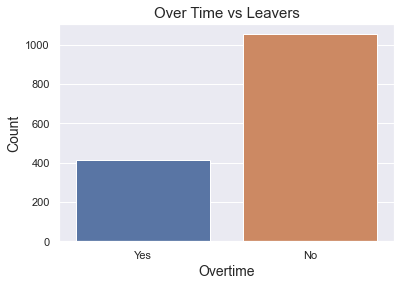

In [37]:

dfwlb= hr_df[hr_df.Attrition==1]
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots()
sns.countplot(x="OverTime", data=hr_df)
ax.set_title("Over Time vs Leavers",fontsize=15)
ax.set_xlabel('Overtime',fontsize=14);
ax.set_ylabel('Count',fontsize=14);

plt.show()

In [38]:
# Employees who do not work overtime tend leave the company.

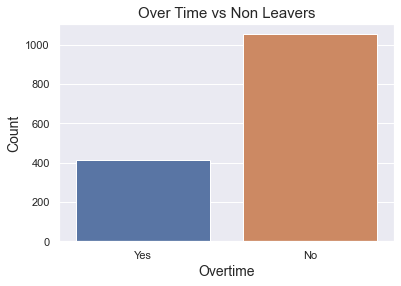

In [39]:
dfwlb= hr_df[hr_df.Attrition==0]
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots()
sns.countplot(x="OverTime", data=hr_df)
ax.set_title("Over Time vs Non Leavers",fontsize=15)
# ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left',fontsize=15)
ax.set_xlabel('Overtime',fontsize=14);
ax.set_ylabel('Count',fontsize=14);

plt.show()

###### OverTime vs Age

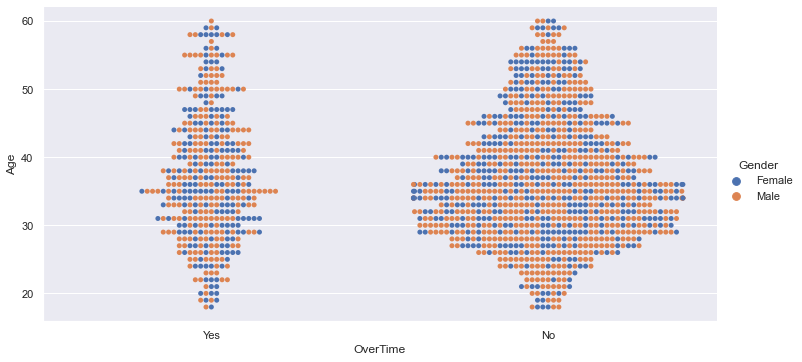

In [40]:
sns.set_theme(style="darkgrid")
sns.catplot(x="OverTime",y="Age",kind="swarm",hue="Gender", data=hr_df, height=5, aspect=2)

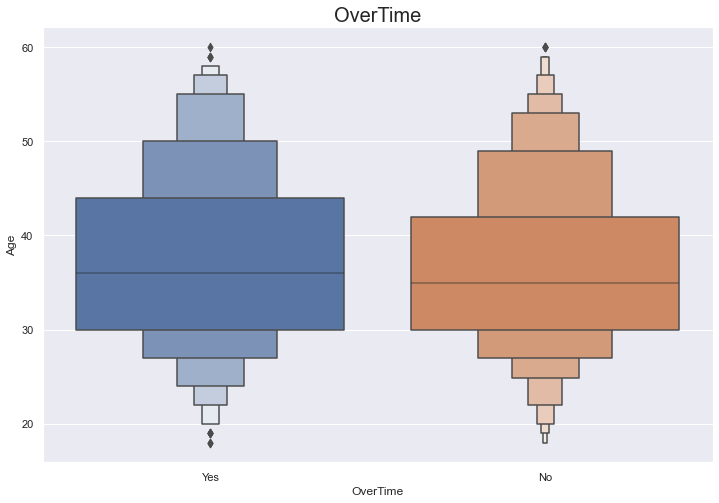

In [41]:
plt.figure(figsize=(12,8))
sns.boxenplot(x="OverTime", y="Age", data=hr_df).set_title("OverTime", fontsize=20)
plt.show()

In [42]:
# Age 30-45 employees have more tend to work overtime.

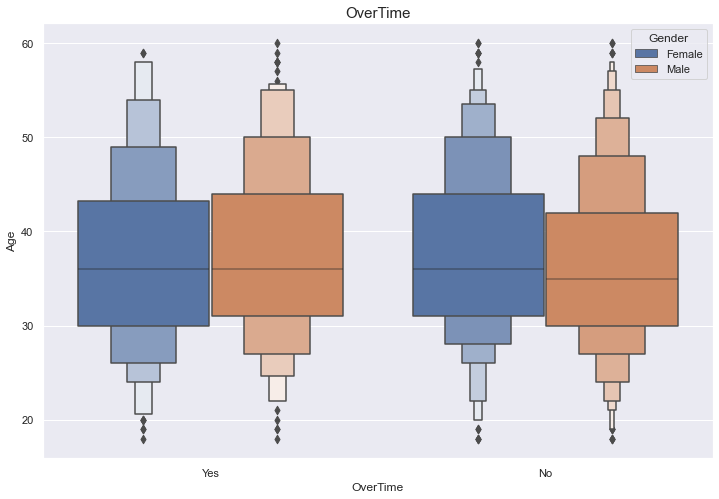

In [43]:
plt.figure(figsize=(12,8))
sns.boxenplot(x="OverTime", y="Age", hue='Gender', data=hr_df).set_title("OverTime", fontsize=15)
plt.show()

###### Attrition vs Age

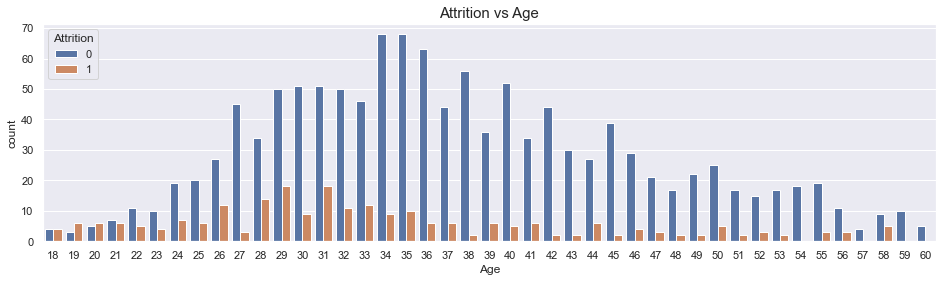

In [44]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (16, 4))
sns.countplot(x="Age",hue="Attrition", data=hr_df).set_title("Attrition vs Age",fontsize=15)
plt.show()

In [45]:
# Age 26 – 35 can be categorized as, higher risk category. Age 35-45 can be identified as the most stable employee group.

###### Attrition vs JobLevel 

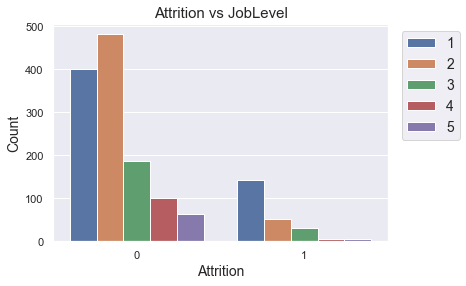

In [46]:
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots()
sns.countplot(x="Attrition",hue="JobLevel", data=hr_df)
ax.set_title("Attrition vs JobLevel",fontsize=15)
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left',fontsize=14)
ax.set_xlabel('Attrition',fontsize=14);
ax.set_ylabel('Count',fontsize=14);

plt.show()

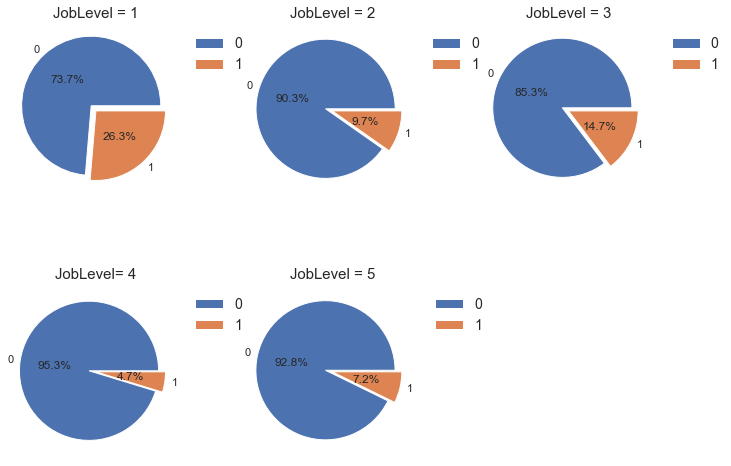

In [47]:
dfwlb= hr_df[hr_df.JobLevel==1]
plt.figure(figsize = (12, 8))
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.subplot(231)
ax = plt.gca()
labels = '0','1'
my_explode = (0.1, 0)
plt.pie(x=dfwlb.groupby("Attrition")['Attrition'].count(), autopct="%.1f%%", explode=my_explode,labels=labels, pctdistance=0.5)
plt.title("JobLevel = 1", fontsize=15);
ax.legend(frameon=False, bbox_to_anchor=(1, 1),fontsize=14)

dfwlb1= hr_df[hr_df.JobLevel==2]
plt.subplot(232)
ax = plt.gca()
plt.pie(x=dfwlb1.groupby("Attrition")['Attrition'].count(), autopct="%.1f%%",explode=my_explode,labels=labels, pctdistance=0.5)
plt.title("JobLevel = 2", fontsize=15);
ax.legend(frameon=False, bbox_to_anchor=(1, 1),fontsize=14)


dfwlb2= hr_df[hr_df.JobLevel==3]
plt.subplot(233)
ax = plt.gca()
plt.pie(x=dfwlb2.groupby("Attrition")['Attrition'].count(), autopct="%.1f%%",explode=my_explode,labels=labels, pctdistance=0.5)
plt.title("JobLevel = 3", fontsize=15);
ax.legend(frameon=False, bbox_to_anchor=(1.02, 1),fontsize=14)

dfwlb3= hr_df[hr_df.JobLevel==4]
plt.subplot(234)
ax = plt.gca()
plt.pie(x=dfwlb3.groupby("Attrition")['Attrition'].count(), autopct="%.1f%%", explode=my_explode,labels=labels, pctdistance=0.5)
plt.title("JobLevel= 4", fontsize=15);
ax.legend(frameon=False, bbox_to_anchor=(1, 1),fontsize=14)


dfwlb4= hr_df[hr_df.JobLevel==5]
plt.subplot(235)
ax = plt.gca()
plt.pie(x=dfwlb4.groupby("Attrition")['Attrition'].count(), autopct="%.1f%%", explode=my_explode,labels=labels, pctdistance=0.5)
plt.title("JobLevel = 5", fontsize=15);
ax.legend(frameon=False, bbox_to_anchor=(1.02, 1),fontsize=14)



In [48]:
# Job level 1 can be categorized as, higher risk category as it has 26.3% turnover.

###### Attrition vs TotalWorkingYears

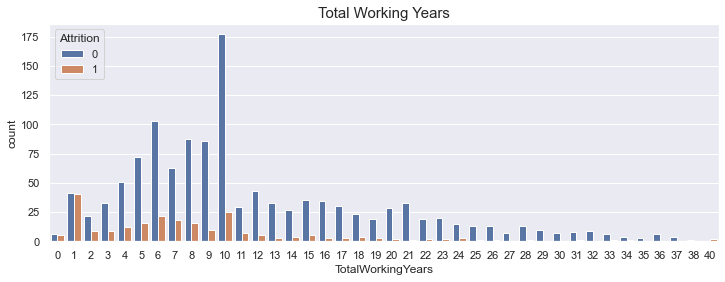

In [49]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (12, 4))
sns.countplot(x="TotalWorkingYears",hue="Attrition", data=hr_df).set_title("Total Working Years",fontsize=15)
plt.show()

In [50]:
# Employees who complete their first or second year has more tend to leave the company.

###### Years In Current Role

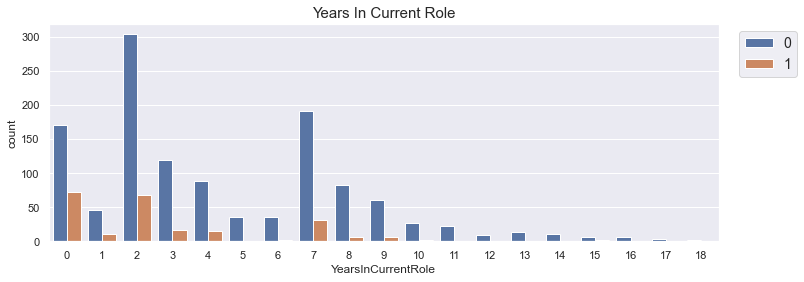

In [51]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (12, 4))
sns.countplot(x="YearsInCurrentRole",hue="Attrition", data=hr_df).set_title("Years In Current Role",fontsize=15)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',fontsize=14)
plt.show()

###### Years With Current Manager

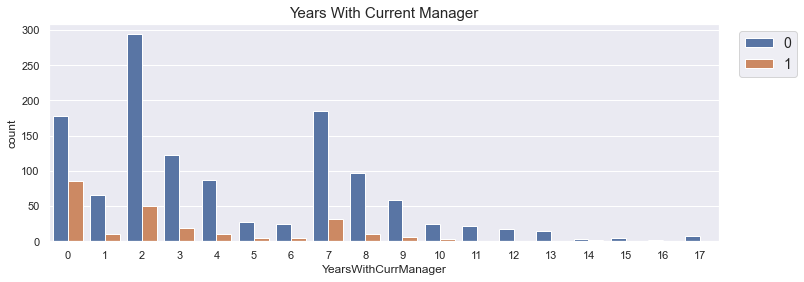

In [52]:
plt.figure(figsize=(12,4))
sns.countplot(x="YearsWithCurrManager",hue="Attrition", data=hr_df).set_title("Years With Current Manager",fontsize=15)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',fontsize=14)
plt.show()

###### Years Since Last Promotion 

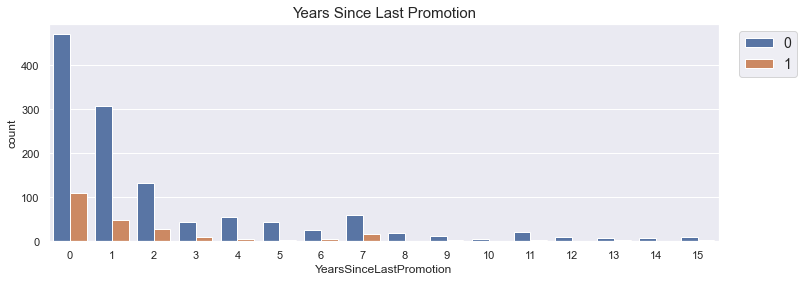

In [53]:
plt.figure(figsize=(12,4))
sns.countplot(x="YearsSinceLastPromotion",hue="Attrition", data=hr_df).set_title("Years Since Last Promotion",fontsize=15)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',fontsize=14)
plt.show()

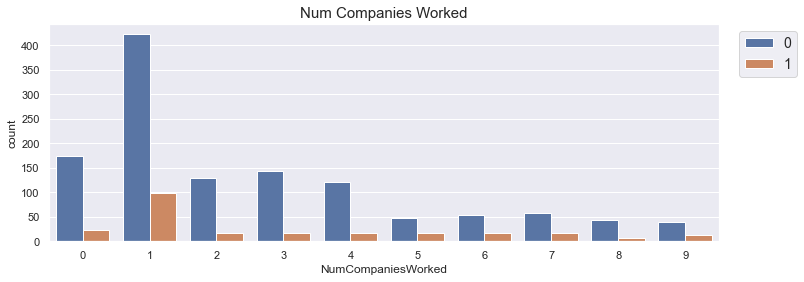

In [54]:
plt.figure(figsize=(12,4))
sns.countplot(x="NumCompaniesWorked",hue="Attrition", data=hr_df).set_title("Num Companies Worked",fontsize=15)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',fontsize=14)
plt.show()

In [55]:
# Employees who have least experience with other companies can identifiy as high risk category.

###### Monthly Income

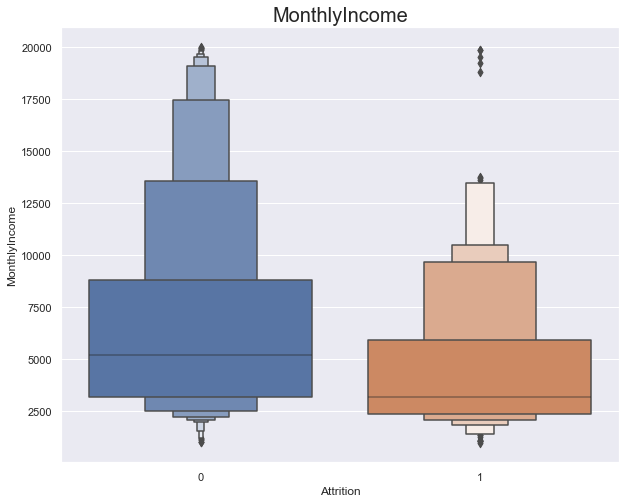

In [56]:
plt.figure(figsize=(10,8))
sns.boxenplot(x="Attrition", y="MonthlyIncome", data=hr_df).set_title("MonthlyIncome", fontsize=20)
plt.show()

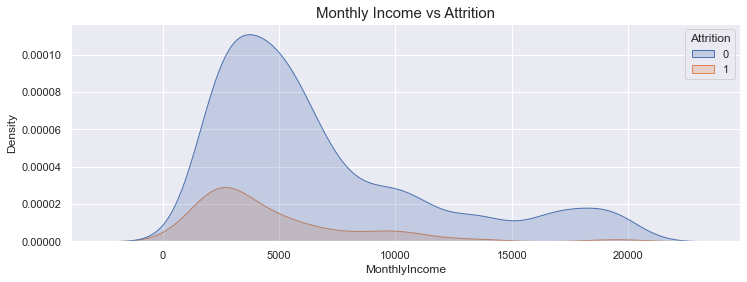

In [57]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (12, 4))
sns.kdeplot(x="MonthlyIncome",hue="Attrition", data=hr_df,fill=True).set_title("Monthly Income vs Attrition",fontsize=15)
plt.show()

In [58]:
# Employees who have high income are less likely to leave

###### Attrition vs Work Life Balance

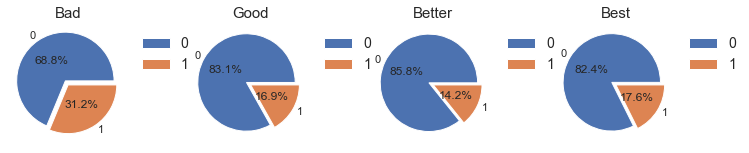

In [59]:

dfwlb= hr_df[hr_df.WorkLifeBalance==1]
plt.figure(figsize = (12, 4))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.subplot(141)
ax = plt.gca()
labels = '0','1'
my_explode = (0.1, 0)
plt.pie(x=dfwlb.groupby("Attrition")['Attrition'].count(), autopct="%.1f%%", explode=my_explode,labels=labels, pctdistance=0.5)
plt.title("Bad", fontsize=15);
ax.legend(frameon=False, bbox_to_anchor=(1, 1),fontsize=14)

dfwlb2= hr_df[hr_df.WorkLifeBalance==2]
plt.subplot(142)
ax = plt.gca()
plt.pie(x=dfwlb2.groupby("Attrition")['Attrition'].count(), autopct="%.1f%%", explode=my_explode,labels=labels, pctdistance=0.5)
plt.title("Good", fontsize=15);
ax.legend(frameon=False, bbox_to_anchor=(1, 1),fontsize=14)

dfwlb3= hr_df[hr_df.WorkLifeBalance==3]
plt.subplot(143)
ax = plt.gca()
plt.pie(x=dfwlb3.groupby("Attrition")['Attrition'].count(), autopct="%.1f%%", explode=my_explode,labels=labels, pctdistance=0.5)
plt.title("Better", fontsize=15);
ax.legend(frameon=False, bbox_to_anchor=(1, 1),fontsize=14)

dfwlb4= hr_df[hr_df.WorkLifeBalance==4]
plt.subplot(144)
ax = plt.gca()
plt.pie(x=dfwlb4.groupby("Attrition")['Attrition'].count(), autopct="%.1f%%", explode=my_explode,labels=labels, pctdistance=0.5)
plt.title("Best", fontsize=15);
ax.legend(frameon=False, bbox_to_anchor=(1, 1),fontsize=14)


In [60]:
# Employees with bad work life balance(31.2%) have higher chance of leaving company.

###### Job Satisfaction

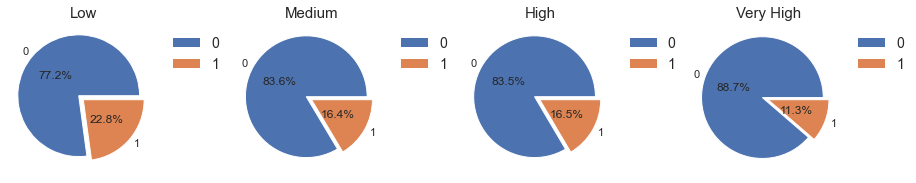

In [61]:

dfwlb= hr_df[hr_df.JobSatisfaction==1]
plt.figure(figsize = (15, 4))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.subplot(141)
ax = plt.gca()
labels = '0','1'
my_explode = (0.1, 0)
plt.pie(x=dfwlb.groupby("Attrition")['Attrition'].count(), autopct="%.1f%%", explode=my_explode,labels=labels, pctdistance=0.5)
plt.title('Low', fontsize=15);
ax.legend(frameon=False, bbox_to_anchor=(1, 1),fontsize=14)

dfwlb2= hr_df[hr_df.JobSatisfaction==2]
plt.subplot(142)
ax = plt.gca()
plt.pie(x=dfwlb2.groupby("Attrition")['Attrition'].count(), autopct="%.1f%%",explode=my_explode,labels=labels, pctdistance=0.5)
plt.title("Medium", fontsize=15);
ax.legend(frameon=False, bbox_to_anchor=(1, 1),fontsize=14)

dfwlb3= hr_df[hr_df.JobSatisfaction==3]
plt.subplot(143)
ax = plt.gca()
plt.pie(x=dfwlb3.groupby("Attrition")['Attrition'].count(), autopct="%.1f%%", explode=my_explode,labels=labels, pctdistance=0.5)
plt.title("High", fontsize=15);
ax.legend(frameon=False, bbox_to_anchor=(1, 1),fontsize=14)

dfwlb4= hr_df[hr_df.JobSatisfaction==4]
plt.subplot(144)
ax = plt.gca()
plt.pie(x=dfwlb4.groupby("Attrition")['Attrition'].count(), autopct="%.1f%%", explode=my_explode,labels=labels, pctdistance=0.5)
plt.title("Very High", fontsize=15);
ax.legend(frameon=False, bbox_to_anchor=(1, 1),fontsize=14)


In [62]:
# Employees with low job satisfaction(22%) have higher chance of leaving company.

###### Attrition by Education

In [63]:
hr_df2=hr_df[hr_df.Attrition==1]
x=hr_df2.groupby("Education")['Education'].count()


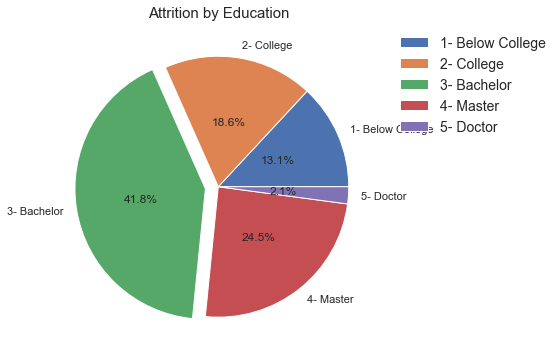

In [64]:
pie, ax = plt.subplots(figsize=[10,6])
labels = '1- Below College','2- College','3- Bachelor','4- Master','5- Doctor'
my_explode = (0, 0,0.1,0,0)
plt.pie(x=x, autopct="%.1f%%", explode=my_explode,labels=labels, pctdistance=0.5)
plt.title("Attrition by Education", fontsize=15);
ax.legend(frameon=False, bbox_to_anchor=(1.02, 1),fontsize=14)

In [65]:
# Employees who have Bachelor and Master Degree have high chance of leaving company.

###### Distance From Home

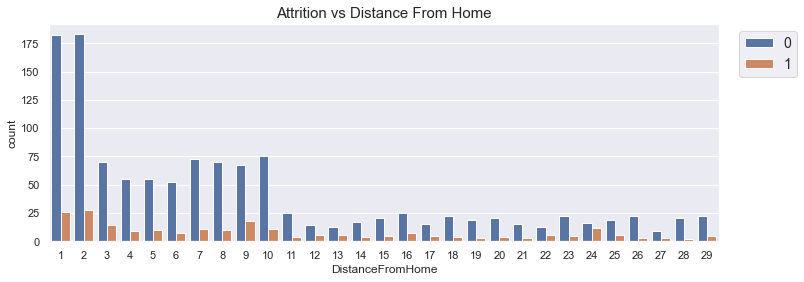

In [66]:
sns.set_theme(style="darkgrid")
plt.figure(figsize = (12, 4))
sns.countplot(x="DistanceFromHome",hue="Attrition", data=hr_df).set_title("Attrition vs Distance From Home",fontsize=15)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',fontsize=14)
plt.show()

In [67]:
# Most of the employees are live closer to company.

## Feature Selection

###### Traget Varable : Attrition

In [68]:
# Check for unique value columns

In [69]:
hr_df['Over18'].unique

<bound method Series.unique of 0       Y
1       Y
2       Y
3       Y
4       Y
       ..
1465    Y
1466    Y
1467    Y
1468    Y
1469    Y
Name: Over18, Length: 1470, dtype: object>

In [70]:
hr_df['StandardHours'].unique

<bound method Series.unique of 0       80
1       80
2       80
3       80
4       80
        ..
1465    80
1466    80
1467    80
1468    80
1469    80
Name: StandardHours, Length: 1470, dtype: int64>

In [71]:
# Drop Zero variate columns
# Dropping Employee_id and Over18 column as they don't have impact on target column(all employees are over 18 and their all standard hours are 80)

In [72]:
hr_df1=hr_df.drop(['EmployeeNumber','StandardHours','Over18','EmployeeCount'], axis = 1)

###### Covert Catergorical variable into Numerical

In [73]:
hr_dummies = pd.get_dummies(data = hr_df1, columns = ['BusinessTravel', 'Department', 'EducationField','OverTime','Gender','JobRole', 'MaritalStatus'  ], 
                                      prefix = ['BusinessTravel', 'Department', 'EducationField','OverTime','Gender','JobRole', 'MaritalStatus'] )

In [74]:
hr_dummies

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,94,3,2,4,...,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,3,61,2,2,2,...,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,4,92,2,1,3,...,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,56,3,1,3,...,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,1,40,3,1,2,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,41,4,2,4,...,1,0,0,0,0,0,0,0,1,0
1466,39,0,613,6,1,4,42,2,3,1,...,0,0,0,0,0,0,0,0,1,0
1467,27,0,155,4,3,2,87,4,2,2,...,0,0,1,0,0,0,0,0,1,0
1468,49,0,1023,2,3,4,63,2,2,2,...,0,0,0,0,0,1,0,0,1,0


<AxesSubplot:>

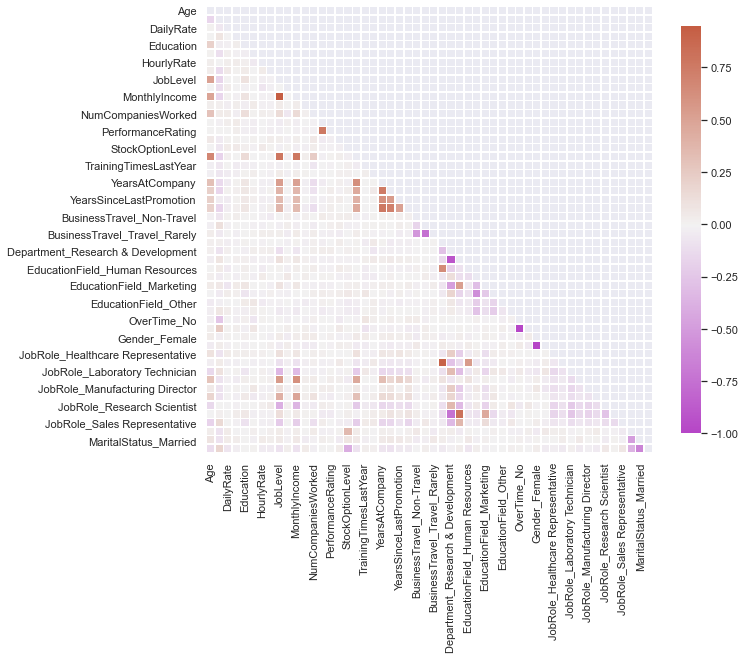

In [75]:
corr = hr_dummies.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, axes = plt.subplots(1,1,figsize=(10,10))
cmap = sns.diverging_palette(300, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, mask=mask, square=True
            , linewidths=.5, cbar_kws={"shrink": .75}
            , center=0, ax=axes)

###### Defining Target and predictor variable

In [76]:
y=hr_dummies['Attrition']
# Take all columns except target as predictor columns
predictor_columns = [c for c in hr_dummies.columns if c != 'Attrition']
# Load the dataset as a pandas data frame
X = pd.DataFrame(hr_dummies, columns = predictor_columns)

In [77]:
# Split the Data

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)

###### Recursive feature elimination with cross-validation (RFECV)

In [79]:
# Define a estimator
cv_estimator= LogisticRegression(solver='liblinear')
cv_estimator.fit(X_train, y_train)
cv_selector = RFECV(cv_estimator,cv= 5, step=1,scoring='accuracy')
cv_selector = cv_selector.fit(X_train, y_train)
rfecv_mask = cv_selector.get_support() #list of booleans
rfecv_features = [] 

In [80]:
print(rfecv_mask)

[ True  True  True  True  True  True  True  True  True False False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]


In [81]:
for bool, feature in zip(rfecv_mask, X.columns):
    if bool:
        rfecv_features.append(feature)

print(" Selected Features Are : ")    
print(rfecv_features)

 Selected Features Are : 
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'Department_Human Resources', 'Department_Research & Development', 'Department_Sales', 'EducationField_Human Resources', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree', 'OverTime_No', 'OverTime_Yes', 'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturi

In [82]:
X_new=pd.DataFrame(hr_dummies, columns=rfecv_features)
X_new.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,2,2,94,3,2,4,8,...,0,0,0,0,0,1,0,0,0,1
1,49,279,8,1,3,61,2,2,2,1,...,0,0,0,0,1,0,0,0,1,0
2,37,1373,2,2,4,92,2,1,3,6,...,1,0,0,0,0,0,0,0,0,1
3,33,1392,3,4,4,56,3,1,3,1,...,0,0,0,0,1,0,0,0,1,0
4,27,591,2,1,1,40,3,1,2,9,...,1,0,0,0,0,0,0,0,1,0


In [83]:
X_new.shape

(1470, 49)

In [84]:
y.shape

(1470,)

##### Feature Engineering -  Scaling X- Values

In [85]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train[rfecv_features])
X_test_sc = sc.transform(X_test[rfecv_features])


## Modeling

#### Logistic Regression

In [86]:
model = LogisticRegression(solver='liblinear')
# # Fit Model
model.fit(X_train_sc,y_train)
# # Score

print(f" Accuracy Score for train data = {model.score(X_train_sc , y_train)}")

 Accuracy Score for train data = 0.8920068027210885


In [87]:
print(f" Accuracy Score for test data = {model.score(X_test_sc , y_test)}")

 Accuracy Score for test data = 0.8945578231292517


###### Hyper Parameter Tuning

In [88]:
lr_params = {'penalty': ['l1','l2'],'C': [0.001,0.1,1, 10, 100]}

logreg=LogisticRegression(max_iter=10000,solver='liblinear')
logreg_cv=GridSearchCV(logreg,lr_params, cv=5, verbose=0)
best_model = logreg_cv.fit(X_train_sc,y_train)
result = best_model.cv_results_
pd.DataFrame.from_dict(result).T

,0,1,2,3,4,5,6,7,8,9
mean_fit_time,0.001803,0.002001,0.004211,0.004405,0.014007,0.005604,0.052414,0.009003,0.126637,0.010803
std_fit_time,0.000396,0.000001,0.000395,0.000496,0.011104,0.000493,0.003557,0.000633,0.019032,0.000401
mean_score_time,0.000582,0.000541,0.000827,0.000832,0.0009,0.000928,0.00066,0.0002,0.001246,0.000816
std_score_time,0.000476,0.000461,0.000417,0.000157,0.000199,0.000224,0.000418,0.0004,0.000416,0.000139
param_C,0.001,0.001,0.1,0.1,1,1,10,10,100,100
param_penalty,l1,l2,l1,l2,l1,l2,l1,l2,l1,l2
params,"{'C': 0.001, 'penalty': 'l1'}","{'C': 0.001, 'penalty': 'l2'}","{'C': 0.1, 'penalty': 'l1'}","{'C': 0.1, 'penalty': 'l2'}","{'C': 1, 'penalty': 'l1'}","{'C': 1, 'penalty': 'l2'}","{'C': 10, 'penalty': 'l1'}","{'C': 10, 'penalty': 'l2'}","{'C': 100, 'penalty': 'l1'}","{'C': 100, 'penalty': 'l2'}"
split0_test_score,0.838983,0.872881,0.860169,0.881356,0.881356,0.881356,0.885593,0.885593,0.885593,0.885593
split1_test_score,0.842553,0.889362,0.889362,0.897872,0.889362,0.889362,0.893617,0.897872,0.897872,0.897872
split2_test_score,0.842553,0.876596,0.87234,0.885106,0.893617,0.889362,0.889362,0.885106,0.889362,0.889362


 ###### Finalize the best score with selected hyper parameters in Logistic regression

In [89]:
#create new a Logistic Regression model
model1 = LogisticRegression(C=0.1, penalty='l2',solver='liblinear')

# Fit Model
model1.fit(X_train_sc,y_train)
# Score
print(f" Accuracy Score for test data = {model1.score(X_test_sc , y_test)}")
print(f" Accuracy Score for train data = {model1.score(X_train_sc , y_train)}")

 Accuracy Score for test data = 0.9047619047619048
 Accuracy Score for train data = 0.8937074829931972


 ###### Cross Validation to check the model accuracy

In [90]:


kfold = model_selection.KFold(n_splits=5)
modelCV = LogisticRegression(C=0.1, penalty='l2',solver='liblinear')
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV,X_train_sc, y_train, cv=kfold, scoring=scoring)
print("5-fold cross validation average accuracy: %.3f" % (results.mean()))

5-fold cross validation average accuracy: 0.883


In [91]:
#The average accuracy remains very close to the Logistic Regression model accuracy; hence, we can conclude that the model generalizes well.
# Train and Test Scores are very close as well.

In [92]:
# confusion matrix
y_pred_class_test = model1.predict(X_test_sc)
print("Confusion Matrix for test data")
print(metrics.confusion_matrix(y_test, y_pred_class_test))

Confusion Matrix for test data
[[241   4]
 [ 24  25]]


Text(0.5, 1.0, 'Logistic Regression Confusion Matrics')

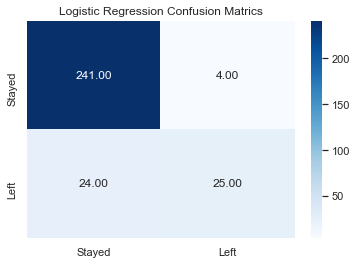

In [93]:
log_cm = metrics.confusion_matrix(y_test, y_pred_class_test, labels=[0,1])
sns.heatmap(log_cm, annot=True, fmt='.2f',xticklabels = ["Stayed","Left"] , yticklabels = ["Stayed","Left"],cmap='Blues' )
plt.title('Logistic Regression Confusion Matrics')

In [94]:
# Classification Report for test data
print("Classification Report for test data")
print(classification_report(y_test, y_pred_class_test))

Classification Report for test data
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       245
           1       0.86      0.51      0.64        49

    accuracy                           0.90       294
   macro avg       0.89      0.75      0.79       294
weighted avg       0.90      0.90      0.89       294



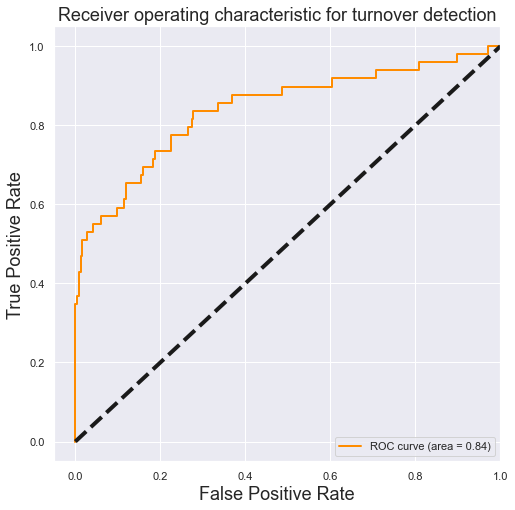

In [95]:
# For class 1, find the area under the curve
# Find fpr, tpr
y_pred_class_test_prob_1 = model1.predict_proba(X_test_sc)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_class_test_prob_1)
# Find auc
roc_auc = metrics.auc(fpr, tpr)
# Plot of a ROC curve for class 1 
plt.figure(figsize=[8,8])
lw = 2
# Plot fpr, tpr
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for turnover detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

#### Support Vector Machine

###### Find best hyper parameters for SVM

In [96]:
svc_params = {
    'C': [0.1,1, 10, 100],
    'gamma': [0.001, 0.0001],
    'kernel': ['linear','rbf']
}
grid_search = GridSearchCV(svm.SVC(), svc_params)
grid_search.fit(X_train_sc, y_train)
result = grid_search.cv_results_
pd.DataFrame.from_dict(result).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
mean_fit_time,0.017207,0.016801,0.016607,0.015605,0.056609,0.017799,0.056389,0.017402,0.34308,0.019003,0.343823,0.037297,4.874089,0.026307,4.887559,0.019608
std_fit_time,0.001163,0.000399,0.001024,0.000496,0.014251,0.000398,0.014053,0.000489,0.050746,0.000895,0.051389,0.03959,1.66108,0.001327,1.669958,0.000494
mean_score_time,0.002803,0.008703,0.002398,0.008003,0.002404,0.008404,0.002166,0.008003,0.002601,0.008207,0.002802,0.008428,0.002401,0.008202,0.0026,0.008002
std_score_time,0.000396,0.000399,0.000487,0.000008,0.000484,0.00049,0.000413,0.000013,0.00049,0.000398,0.000401,0.000477,0.00049,0.0004,0.000487,0.000001
param_C,0.1,0.1,0.1,0.1,1,1,1,1,10,10,10,10,100,100,100,100
param_gamma,0.001,0.001,0.0001,0.0001,0.001,0.001,0.0001,0.0001,0.001,0.001,0.0001,0.0001,0.001,0.001,0.0001,0.0001
param_kernel,linear,rbf,linear,rbf,linear,rbf,linear,rbf,linear,rbf,linear,rbf,linear,rbf,linear,rbf
params,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}","{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.0001, 'kernel': 'linear'}","{'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.001, 'kernel': 'linear'}","{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}","{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.001, 'kernel': 'linear'}","{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.0001, 'kernel': 'linear'}","{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.001, 'kernel': 'linear'}","{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.0001, 'kernel': 'linear'}","{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}"
split0_test_score,0.872881,0.838983,0.872881,0.838983,0.877119,0.838983,0.877119,0.838983,0.877119,0.860169,0.877119,0.838983,0.877119,0.877119,0.877119,0.864407
split1_test_score,0.902128,0.842553,0.902128,0.842553,0.893617,0.842553,0.893617,0.842553,0.906383,0.876596,0.906383,0.842553,0.906383,0.880851,0.906383,0.876596


In [97]:
#create new a SVM model
svc_model = svm.SVC(kernel = 'linear', C = 0.1, gamma=0.001, probability=True)
svc_model.fit(X_train_sc, y_train)
y_pred = svc_model.predict(X_test_sc)

print(f" Accuracy Score for test data = {svc_model.score(X_test_sc, y_test)}")
print(f" Accuracy Score for train data = {svc_model.score(X_train_sc, y_train)}")

 Accuracy Score for test data = 0.891156462585034
 Accuracy Score for train data = 0.8869047619047619


In [98]:
# Cross Validation
kfold1 = model_selection.KFold(n_splits=5)
modelCV1 = svm.SVC(kernel = 'linear', C = 0.1, gamma=0.0001, probability=True)
scoring1 = 'accuracy'
results1 = model_selection.cross_val_score(modelCV1, X_train_sc, y_train, cv=kfold, scoring=scoring1)
results1
print("5-fold cross validation average accuracy: %.3f" % (results1.mean()))

5-fold cross validation average accuracy: 0.880


In [99]:
#The average accuracy remains very close to the SVC model accuracy; hence, we can conclude that the model generalizes well.
# Train and Test Scores are almost identical.

Confusion Matrix for test data
[[242   3]
 [ 29  20]]


Text(0.5, 1.0, 'SVM Confusion Matrics')

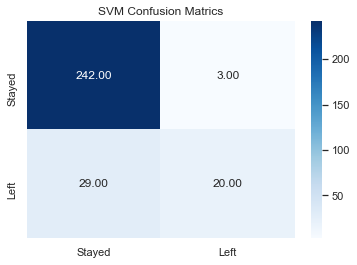

In [100]:
y_pred_class_test2 = svc_model.predict(X_test_sc)
print("Confusion Matrix for test data")
print(metrics.confusion_matrix(y_test, y_pred_class_test2))
svc_cm = metrics.confusion_matrix(y_test, y_pred_class_test2, labels=[0,1])
sns.heatmap(svc_cm, annot=True, fmt='.2f',xticklabels = ["Stayed","Left"] , yticklabels = ["Stayed","Left"],cmap='Blues' )
plt.title('SVM Confusion Matrics')

In [101]:
# Classification Report for test data
print("Classification Report for test data")
print(classification_report(y_test, y_pred_class_test2))

Classification Report for test data
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       245
           1       0.87      0.41      0.56        49

    accuracy                           0.89       294
   macro avg       0.88      0.70      0.75       294
weighted avg       0.89      0.89      0.87       294



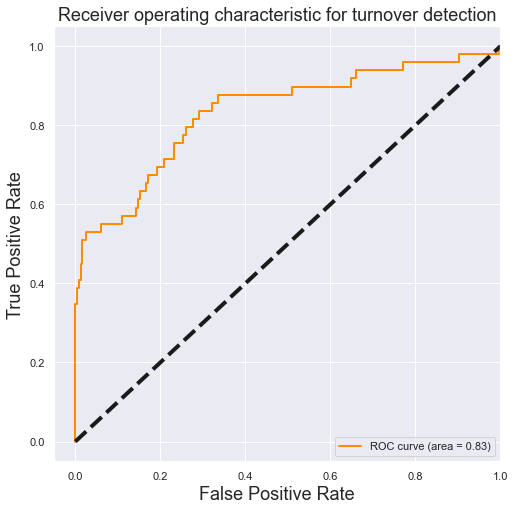

In [102]:
# For class 1, find the area under the curve
# Find fpr, tpr
y_pred_class_test_prob_2 = svc_model.predict_proba(X_test_sc)[:,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test, y_pred_class_test_prob_2)
# Find auc
roc_auc1 = metrics.auc(fpr1, tpr1)
# Plot of a ROC curve for class 1 
plt.figure(figsize=[8,8])
lw = 2
# Plot fpr, tpr
plt.plot(fpr1, tpr1, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for turnover detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

#### Naive Bayes

In [103]:
#create new a Naive Bayes model
gnb_model = GaussianNB()
gnb_model.fit(X_train_sc, y_train)
y_pred = gnb_model.predict(X_test_sc)

In [104]:
print(f" Accuracy Score for test data = {gnb_model.score(X_test_sc, y_test)}")
print(f" Accuracy Score for train data = {gnb_model.score(X_train_sc, y_train)}")

 Accuracy Score for test data = 0.7108843537414966
 Accuracy Score for train data = 0.7032312925170068


Confusion Matrix for test data
[[173  72]
 [ 13  36]]


Text(0.5, 1.0, 'Naive bAYES Confusion Matrics')

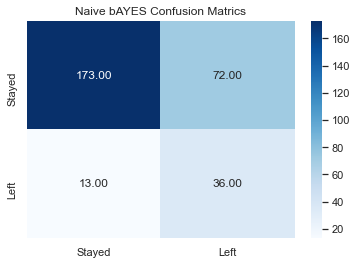

In [105]:
# confusion matrix
y_pred_class_test3 = gnb_model.predict(X_test_sc)
print("Confusion Matrix for test data")
print(metrics.confusion_matrix(y_test, y_pred_class_test3))
nb_cm = metrics.confusion_matrix(y_test, y_pred_class_test3, labels=[0,1])
sns.heatmap(nb_cm, annot=True, fmt='.2f',xticklabels = ["Stayed","Left"] , yticklabels = ["Stayed","Left"],cmap='Blues' )
plt.title('Naive bAYES Confusion Matrics')

In [106]:
# Classification Report for test data
print("Classification Report for test data")
print(classification_report(y_test, y_pred_class_test3))

Classification Report for test data
              precision    recall  f1-score   support

           0       0.93      0.71      0.80       245
           1       0.33      0.73      0.46        49

    accuracy                           0.71       294
   macro avg       0.63      0.72      0.63       294
weighted avg       0.83      0.71      0.75       294



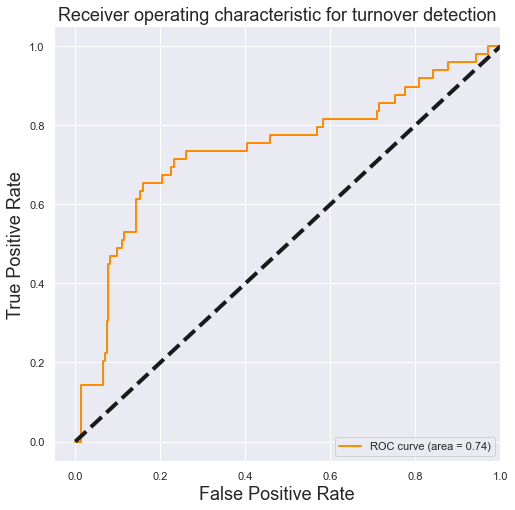

In [107]:
# For class 1, find the area under the curve
# Find fpr, tpr
y_pred_class_test_prob_3 = gnb_model.predict_proba(X_test_sc)[:,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test, y_pred_class_test_prob_3)
# Find auc
roc_auc2 = metrics.auc(fpr2, tpr2)
# Plot of a ROC curve for class 1 
plt.figure(figsize=[8,8])
lw = 2
# Plot fpr, tpr
plt.plot(fpr2, tpr2, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for turnover detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

#### K Nearest Neighbor 

###### Find best hyper parameters for SVM

In [108]:
#create new a knn model
knn2 = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 25)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

knn_gscv.fit(X_test_sc, y_test)
result = knn_gscv.cv_results_
pd.DataFrame.from_dict(result).T

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
mean_fit_time,0.000603,0.0,0.000604,0.000605,0.000603,0.0,0.000601,0.000601,0.0006,0.000604,...,0.000603,0.000604,0.0004,0.000798,0.000202,0.000401,0.000202,0.000402,0.0002,0.000804
std_fit_time,0.000803,0.0,0.000493,0.000494,0.000492,0.0,0.000491,0.00049,0.00049,0.000493,...,0.000492,0.000493,0.00049,0.000399,0.000403,0.000491,0.000403,0.000492,0.000401,0.000402
mean_score_time,0.003001,0.002195,0.002597,0.002395,0.002596,0.002797,0.002797,0.002599,0.002603,0.002597,...,0.002599,0.002591,0.003002,0.002401,0.003398,0.003399,0.003195,0.003602,0.002998,0.002397
std_score_time,0.000632,0.000395,0.00081,0.000494,0.000489,0.000404,0.000399,0.000486,0.000493,0.000495,...,0.000495,0.000496,0.000637,0.000486,0.000493,0.000492,0.000403,0.000492,0.00064,0.000806
param_n_neighbors,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
params,{'n_neighbors': 1},{'n_neighbors': 2},{'n_neighbors': 3},{'n_neighbors': 4},{'n_neighbors': 5},{'n_neighbors': 6},{'n_neighbors': 7},{'n_neighbors': 8},{'n_neighbors': 9},{'n_neighbors': 10},...,{'n_neighbors': 15},{'n_neighbors': 16},{'n_neighbors': 17},{'n_neighbors': 18},{'n_neighbors': 19},{'n_neighbors': 20},{'n_neighbors': 21},{'n_neighbors': 22},{'n_neighbors': 23},{'n_neighbors': 24}
split0_test_score,0.762712,0.847458,0.864407,0.847458,0.881356,0.847458,0.830508,0.830508,0.830508,0.830508,...,0.830508,0.830508,0.830508,0.830508,0.830508,0.830508,0.830508,0.830508,0.830508,0.830508
split1_test_score,0.830508,0.847458,0.847458,0.847458,0.864407,0.830508,0.864407,0.830508,0.830508,0.830508,...,0.864407,0.830508,0.830508,0.830508,0.830508,0.830508,0.830508,0.830508,0.830508,0.830508
split2_test_score,0.813559,0.830508,0.79661,0.813559,0.79661,0.813559,0.813559,0.813559,0.813559,0.813559,...,0.830508,0.830508,0.830508,0.830508,0.830508,0.830508,0.830508,0.830508,0.830508,0.830508
split3_test_score,0.813559,0.847458,0.864407,0.864407,0.847458,0.864407,0.847458,0.847458,0.830508,0.830508,...,0.830508,0.830508,0.830508,0.830508,0.830508,0.830508,0.830508,0.830508,0.830508,0.830508


In [116]:
#create KNN model
KNN_model2 = KNeighborsClassifier(n_neighbors=15)

#Fit Model
KNN_model2.fit(X_train_sc, y_train)

y_pred =KNN_model2.predict(X_test_sc)

print(f" Accuracy Score for test data = {KNN_model2.score(X_test_sc, y_test)}")
print(f" Accuracy Score for train data = {KNN_model2.score(X_train_sc, y_train)}")

 Accuracy Score for test data = 0.8435374149659864
 Accuracy Score for train data = 0.8528911564625851


Confusion Matrix for test data
[[243   2]
 [ 44   5]]


Text(0.5, 1.0, 'KNN Confusion Matrics')

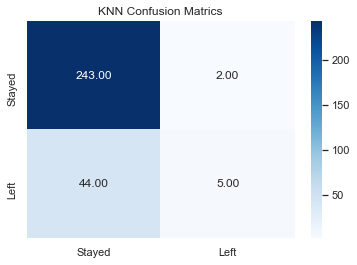

In [117]:
# confusion matrix
y_pred_class_test4 = KNN_model2.predict(X_test_sc)
print("Confusion Matrix for test data")
print(metrics.confusion_matrix(y_test, y_pred_class_test4))
knn_cm = metrics.confusion_matrix(y_test, y_pred_class_test4, labels=[0,1])
sns.heatmap(knn_cm, annot=True, fmt='.2f',xticklabels = ["Stayed","Left"] , yticklabels = ["Stayed","Left"],cmap='Blues' )
plt.title('KNN Confusion Matrics')

In [118]:
# Classification Report for test data
print("Classification Report for test data")
print(classification_report(y_test, y_pred_class_test4))

Classification Report for test data
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       245
           1       0.71      0.10      0.18        49

    accuracy                           0.84       294
   macro avg       0.78      0.55      0.55       294
weighted avg       0.82      0.84      0.79       294



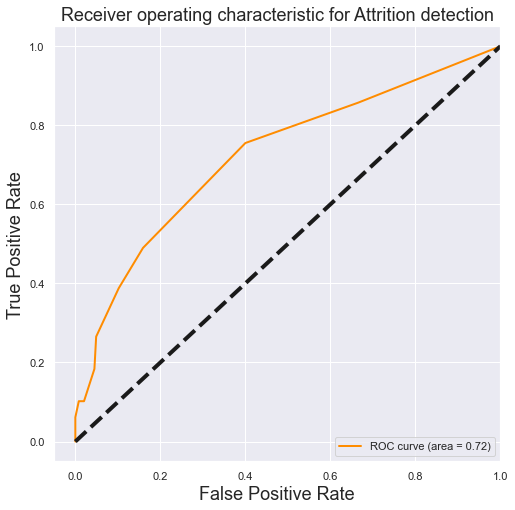

In [119]:
# For class 1, find the area under the curve
# Find fpr, tpr
y_pred_class_test_prob_4 = KNN_model2.predict_proba(X_test_sc)[:,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test, y_pred_class_test_prob_4)
# Find auc
roc_auc3 = metrics.auc(fpr3, tpr3)
# Plot of a ROC curve for class 1
plt.figure(figsize=[8,8])
lw = 2
# Plot fpr, tpr

plt.plot(fpr3, tpr3, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc3)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for Attrition detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

##### Summary ROC for All Models

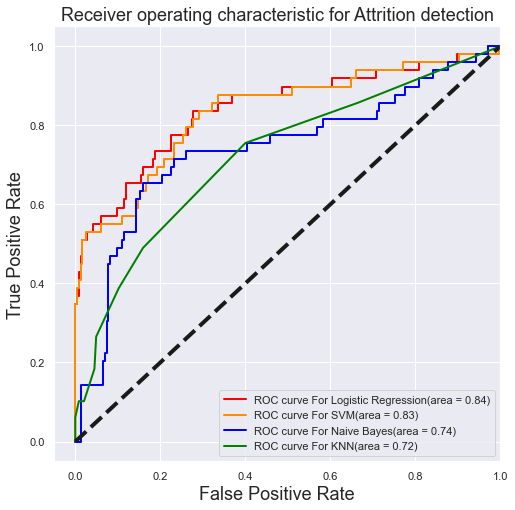

In [120]:
plt.figure(figsize=[8,8])
lw = 2
# Plot fpr, tpr
plt.plot(fpr, tpr, color='red', lw = lw, label = 'ROC curve For Logistic Regression(area = %0.2f)' % roc_auc)
plt.plot(fpr1, tpr1, color='darkorange', lw = lw, label = 'ROC curve For SVM(area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='blue', lw = lw, label = 'ROC curve For Naive Bayes(area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, color='green', lw = lw, label = 'ROC curve For KNN(area = %0.2f)' % roc_auc3)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for Attrition detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [114]:
# Logistic regression model has highest accuracy out of all models.
# As this is the unbalance dataset, we had to investigated precision and recall for further analysis. However, for HR analytics both recall and precision is equally important. Based on the f1 – Score and ROC logistic regression model  perform better than all other models.


##### Feature Importance

[0.04198682 0.02956389 0.03400295 0.02591341 0.03580293 0.02847054
 0.02887688 0.032634   0.03183407 0.03045401 0.02470818 0.01186618
 0.03128995 0.02062068 0.03498666 0.02770988 0.03226003 0.03463345
 0.03191469 0.02680516 0.03193136 0.00624988 0.01903724 0.01302189
 0.00407295 0.00940221 0.01075832 0.00317141 0.01604345 0.01175567
 0.01779584 0.00589656 0.01184373 0.04130565 0.02945289 0.01709461
 0.01663763 0.00676667 0.00418893 0.01795679 0.00454798 0.00768965
 0.00326516 0.01103363 0.01080877 0.01422699 0.01146307 0.01374572
 0.03250096]


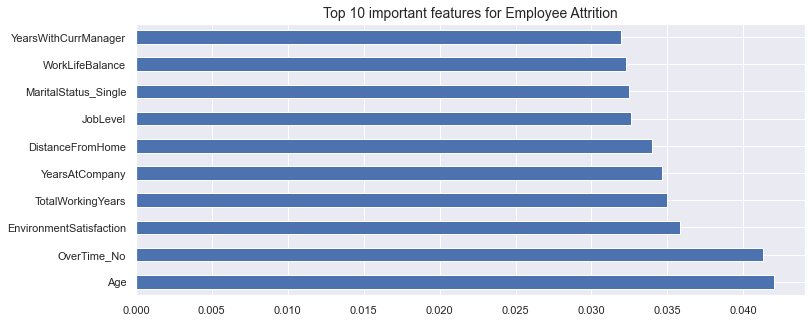

In [115]:
from sklearn.ensemble import ExtraTreesClassifier


model_f = ExtraTreesClassifier()
model_f.fit(X_new,y)
print(model_f.feature_importances_) ## use inbuilt class feature_importances of tree based classifiers
## plot graph of feature importances for better visualization
feat_importances = pd.Series(model_f.feature_importances_, index=X_new.columns)
plt.figure(figsize=(12, 5))
sns.set_theme(style="darkgrid")
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 important features for Employee Attrition",fontsize=14)
plt.show()

#### Summary

- Employee attrition can be predicted with 90 % accuracy with Logistic regression.
- Employees who do not work overtime tend leave the company. 
- Employees who have two to three years of experience has a higher risk of leaving.
- Age 26 – 35 can be categorized as, higher risk category. Age 35-45 can be identified as the most stable employee group.
- Employees who have high income are less likely to leave.
- Employees with low job satisfaction(22%) and bad work life balance(31%) have higher chance of leaving company.
- Laboratory technician (job role) has the highest employee turnover among other job roles. Sales department has the highest percentage(21%) of turnover employees.
